> 

# Project: Investigate a Dataset (The Movie Database 'TMDb')

## Name : Mohamed Ahmed Makki
## E-mail: ugtta@yahoo.com

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> my project in "Investigate a Dataset" will be in (The Movie Database 'TMDb'). this database available in a very famous website {The Movie Database (TMDb) | https://www.themoviedb.org} &  {IMDb: Ratings and Reviews for New Movies and TV Shows | https://www.imdb.com}. containing all information and data about moviesreleased across many of years till nowadays.
my job will be
- importing the necessary packages for coding (numpy, pandas, matplotlib . . etc)
- loading the proper/chosen dataset that will be investigated here.
- data wrangling and cleaning
- exploratory data analysis
- then posing some quetions about this data.
- collecting all information to answer the posed questions
- draw necessary graphs that will ilustrate and answer our questions

In [2]:
#   import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 



<a id='wrangling'></a>
## Data Wrangling

> starting with loading the data, check for cleanliness, and then trim and clean dataset for analysis. Make sure that   

 

In [3]:
# loading data (imdb-movies)
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')
df.head()
 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# size of table (rows, columns)
df.shape

(10866, 21)

In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(10865, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

 
### Data Cleaning : by removing duplicated rows, removing some unwanted columns (in this invetigation), finding rows with missing Values. . and more as follows:

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


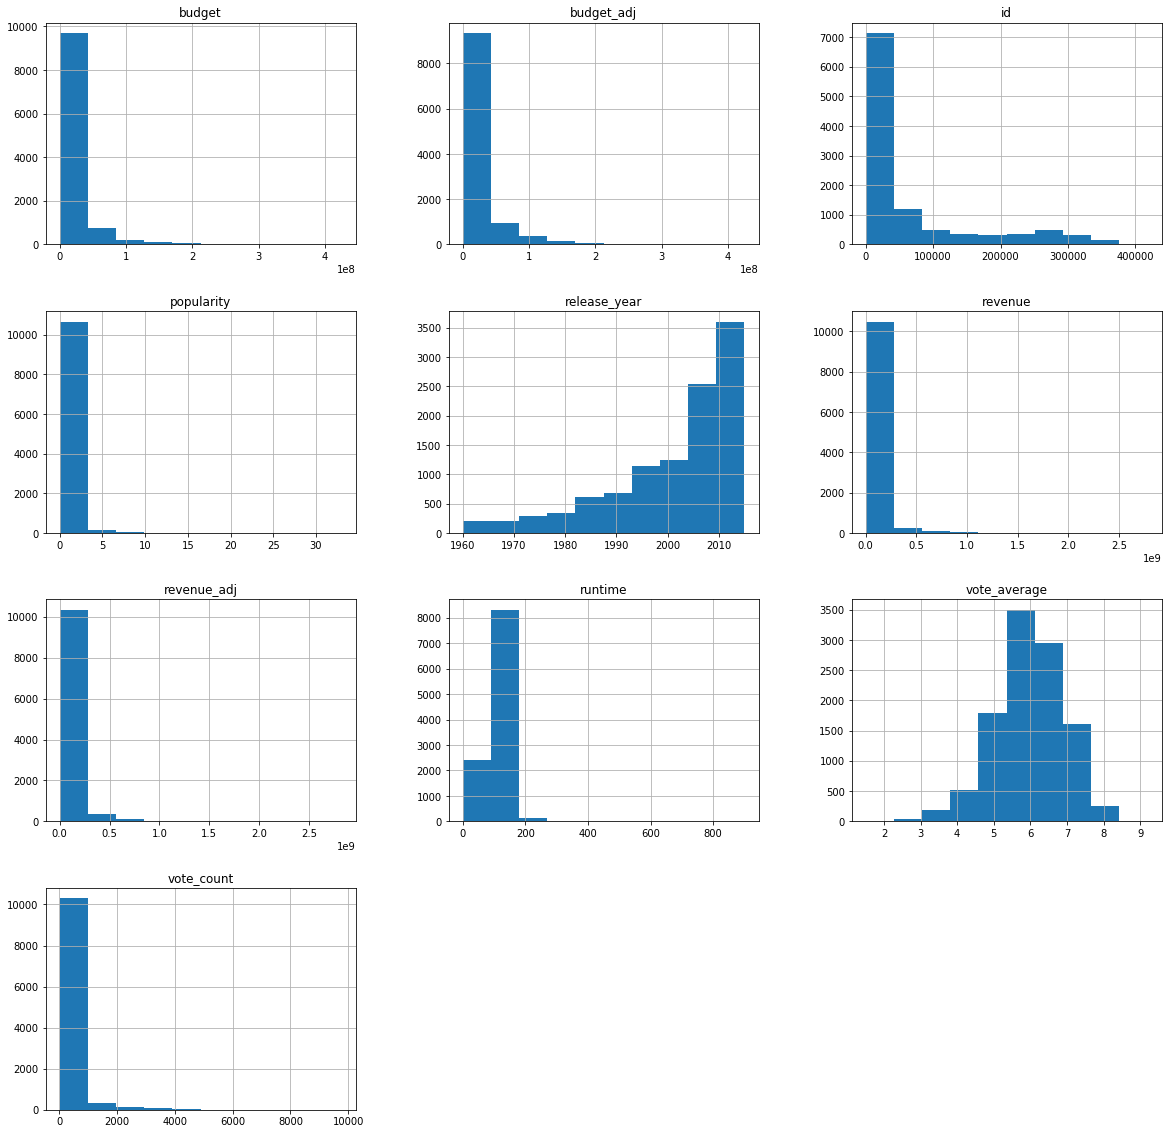

In [10]:
df.hist(figsize=(20,20));

In [11]:
# lets find columns with missing values
df.columns[df.isnull().any()]

Index(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords',
       'overview', 'genres', 'production_companies'],
      dtype='object')

In [12]:
# counting the missing values in each columns
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [13]:
# we have to drop some columns that we are not going to us becuase they are out of our iterest or they have missing data that we can not recover
df.drop(['imdb_id', 'cast', 'homepage', 'tagline', 'keywords',
       'overview', 'production_companies', 'budget', 'revenue'], axis =1, inplace=True)

In [14]:
df.shape

(10865, 12)

In [15]:
# let's drop the these rows with missing data (NaN) 
df.dropna(inplace=True)

In [16]:
# counting again the missing values in each columns after cleaning some columns
df.isnull().sum()

id                0
popularity        0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [17]:
# our final data after cleaning some columns and rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 12 columns):
id                10800 non-null int64
popularity        10800 non-null float64
original_title    10800 non-null object
director          10800 non-null object
runtime           10800 non-null int64
genres            10800 non-null object
release_date      10800 non-null object
vote_count        10800 non-null int64
vote_average      10800 non-null float64
release_year      10800 non-null int64
budget_adj        10800 non-null float64
revenue_adj       10800 non-null float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1.1+ MB


In [18]:
# we get rid of rows with missing data, but let's chech if some columns have zero value.
df.loc[df.budget_adj ==0]

,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,3.927333,Mr. Holmes,Bill Condon,103,Mystery|Drama,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,3.358321,Solace,Afonso Poyart,101,Crime|Drama|Mystery,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,2.272044,Beyond the Reach,Jean-Baptiste LÃ©onetti,95,Thriller,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,2.165433,Mythica: The Darkspore,Anne K. Black,108,Action|Adventure|Fantasy,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,2.141506,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,105,Comedy|Drama,6/12/15,569,7.7,2015,0.0,0.000000e+00
88,301875,1.959765,Equals,Drake Doremus,101,Drama|Romance|Science Fiction,9/4/15,135,5.6,2015,0.0,1.839999e+06
92,370687,1.876037,Mythica: The Necromancer,A. Todd Smith,0,Fantasy|Action|Adventure,12/19/15,11,5.4,2015,0.0,0.000000e+00
95,258509,1.841779,Alvin and the Chipmunks: The Road Chip,Walt Becker,92,Adventure|Animation|Comedy|Family,12/17/15,278,5.7,2015,0.0,2.150550e+08
100,326359,1.724712,Frozen Fever,Chris Buck|Jennifer Lee,8,Adventure|Animation|Family,3/9/15,475,7.0,2015,0.0,0.000000e+00
101,254302,1.661789,High-Rise,Ben Wheatley,119,Action|Drama|Science Fiction,9/26/15,161,5.4,2015,0.0,0.000000e+00


In [19]:
# same for revenue_adj and we'll find that about half of these two columns have zero values.
df.loc[df.revenue_adj ==0]

,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,2.932340,Wild Card,Simon West,92,Thriller|Crime|Drama,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,2.331636,Survivor,James McTeigue,96,Crime|Thriller|Action,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,2.165433,Mythica: The Darkspore,Anne K. Black,108,Action|Adventure|Fantasy,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,2.141506,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,105,Comedy|Drama,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,1.876037,Mythica: The Necromancer,A. Todd Smith,0,Fantasy|Action|Adventure,12/19/15,11,5.4,2015,0.000000e+00,0.0
93,307663,1.872696,Vice,Brian A Miller,96,Thriller|Science Fiction|Action|Adventure,1/16/15,181,4.1,2015,9.199996e+06,0.0
100,326359,1.724712,Frozen Fever,Chris Buck|Jennifer Lee,8,Adventure|Animation|Family,3/9/15,475,7.0,2015,0.000000e+00,0.0
101,254302,1.661789,High-Rise,Ben Wheatley,119,Action|Drama|Science Fiction,9/26/15,161,5.4,2015,0.000000e+00,0.0
103,292040,1.646664,Spooks: The Greater Good,Bharat Nalluri,104,Thriller|Action,4/11/15,114,5.6,2015,0.000000e+00,0.0
116,297291,1.380320,The Scorpion King: The Lost Throne,Mike Elliott,105,Action|Fantasy|Adventure,1/9/15,22,4.5,2015,0.000000e+00,0.0


In [20]:
# we can't delete all these big rows with zero values
# we can't also replace the zero values by mean method as the big numbers of zero data will affect on the value of mean
# the best method in our case is to use the non_zeros mean (mean of columns for values NOT equal zero)

nonzero_budget_adj_mean = df[df.budget_adj !=0].mean() 

nonzero_budget_adj_mean

id              4.545144e+04
popularity      9.931836e-01
runtime         1.071017e+02
vote_count      4.090292e+02
vote_average    6.032552e+00
release_year    2.001250e+03
budget_adj      3.692239e+07
revenue_adj     1.022921e+08
dtype: float64

In [21]:
nonzero_revenue_adj_mean = df[df.revenue_adj !=0].mean() 

nonzero_revenue_adj_mean

id              4.458150e+04
popularity      1.045387e+00
runtime         1.079587e+02
vote_count      4.363709e+02
vote_average    6.149072e+00
release_year    2.000918e+03
budget_adj      3.516846e+07
revenue_adj     1.151223e+08
dtype: float64

In [22]:
# we find now the non_zero_ mean for both budget_adj and revenue_adj
# nonzero_budget_adj_mean = 3.692239e+07
# nonzero_revenue_adj_mean = 1.151223e+08
# now we may fill the the data with zero values with above mentioned calculated mean
df.budget_adj.replace((0, 3.692239e+07), inplace=True)
df.revenue_adj.replace((0, 1.151223e+08), inplace=True)

In [23]:
# now lets check again if we have zeros values in these two columns
df.loc[df.budget_adj ==0]
df.loc[df.revenue_adj ==0]
# now we'll find no zero values in our data frame

,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


<a id='eda'></a>
## Exploratory Data Analysis

> starting posing some questions and try to get the proper answers from available dataset and by drawing the necessary graphs

### Research Question 1 (Distribution of movies genres in IMDB)

In [24]:
# as the genres column have data contains more than one string, so we have to separate all these strings and take them in consideration
# using (str.contains) allows seperating all these strings
# then this will let me count of iteration of each or values_count of each genres
comedy_films =df[df['genres'].str.contains('Comedy')]
drama_films =df[df['genres'].str.contains('Drama')]
romance_films =df[df['genres'].str.contains('Romance')]
action_films =df[df['genres'].str.contains('Action')]
crime_films =df[df['genres'].str.contains('Crime')]
horror_films =df[df['genres'].str.contains('Horror')]
thriller_films =df[df['genres'].str.contains('Thriller')]
adventure_films =df[df['genres'].str.contains('Adventure')]
mystery_films =df[df['genres'].str.contains('Mystery')]
fantasy_films =df[df['genres'].str.contains('Fantasy')]
family_films =df[df['genres'].str.contains('Family')]
sci_fi_films =df[df['genres'].str.contains('Science Fiction')]
history_films =df[df['genres'].str.contains('History')]
war_films =df[df['genres'].str.contains('War')]
western_films =df[df['genres'].str.contains('Western')]
music_films =df[df['genres'].str.contains('Music')]
animation_films =df[df['genres'].str.contains('Animation')]
documentary_films =df[df['genres'].str.contains('Documentary')]
tv_films =df[df['genres'].str.contains('TV')]

comedy_films.shape[0], drama_films.shape[0], romance_films.shape[0], action_films.shape[0], crime_films.shape[0], horror_films.shape[0], thriller_films.shape[0], adventure_films.shape[0], mystery_films.shape[0], fantasy_films.shape[0], family_films.shape[0], sci_fi_films.shape[0], history_films.shape[0], war_films.shape[0], western_films.shape[0], music_films.shape[0], animation_films.shape[0], documentary_films.shape[0], tv_films.shape[0]


(3782,
 4754,
 1708,
 2378,
 1353,
 1636,
 2904,
 1466,
 809,
 912,
 1223,
 1223,
 332,
 270,
 164,
 402,
 692,
 509,
 162)

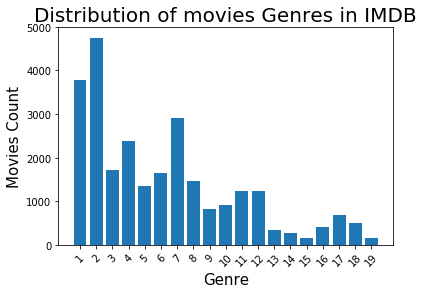

In [25]:
location = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
height = [comedy_films.shape[0], drama_films.shape[0], romance_films.shape[0], action_films.shape[0], crime_films.shape[0], horror_films.shape[0], thriller_films.shape[0], adventure_films.shape[0], mystery_films.shape[0], fantasy_films.shape[0], family_films.shape[0], sci_fi_films.shape[0], history_films.shape[0], war_films.shape[0], western_films.shape[0], music_films.shape[0], animation_films.shape[0], documentary_films.shape[0], tv_films.shape[0]]


label = ['comedy', 'drama', 'romance', 'action', 'crime, horror', 'thriller', 'adventure', 'mystery', 'fantasy', 'family', 'science_fiction' , 'history' , 'war', 'western', 'music', 'animation', 'documentary', 'Tv']


index = np.arange(len(location))
plt.bar(index, height, tick_label='label')
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Movies Count', fontsize=15)
plt.xticks(index, location, fontsize=10, rotation=45)
plt.title('Distribution of movies Genres in IMDB', fontsize=20);


## from previous graph will find that Drama films are most numbers of films available in IMDB, then comedy films, thriller and finally the action films, in other hand the Tv-films and western films are the less numbers of films available in IMDB.

### Research Question 2  (relationship between Revenues_adj, Budget_adj anf Popularity, are movies with high revenues or high budget have a higher popularity and viceversa)

In [26]:
# computing the mean of Revenue_adj 
df.revenue_adj.mean()

73262288.600239351

In [27]:
high_revenue= df.query('revenue_adj>73262288.6')
low_revenue= df.query('revenue_adj<=73262288.6')

In [28]:
high_popularity = high_revenue['popularity'].mean() 
low_popularity = low_revenue['popularity'].mean() 

high_popularity, low_popularity

(1.3098792565765764, 0.42108383052959497)

Text(0,0.5,'Mean popularity')

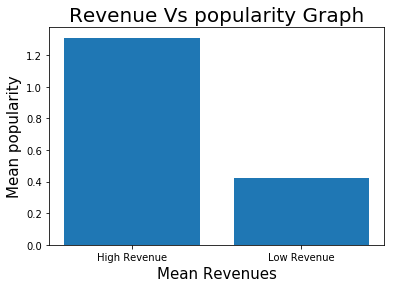

In [29]:
locations = [1, 2]
heights =[high_popularity, low_popularity]
labels = ['High Revenue', 'Low Revenue']

plt.bar(locations, heights, tick_label=labels)
plt.title('Revenue Vs popularity Graph', fontsize=20)
plt.xlabel('Mean Revenues', fontsize=15)
plt.ylabel('Mean popularity', fontsize=15)


In [30]:
# same here for Budget: computing the mean of Budget_adj 

df.budget_adj.mean()

27016937.528131425

In [31]:
high_budget= df.query('budget_adj>27016937.5')
low_budget= df.query('budget_adj<=27016937.5')

In [32]:
high_popularity = high_budget['popularity'].mean() 
low_popularity = low_budget['popularity'].mean() 

high_popularity, low_popularity

(1.1160031563225057, 0.43064931909684434)

Text(0,0.5,'Mean popularity')

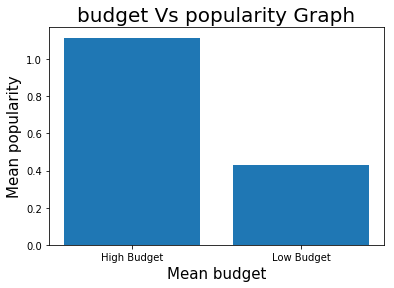

In [33]:
locations = [1, 2]
heights =[high_popularity, low_popularity]
labels = ['High Budget', 'Low Budget']

plt.bar(locations, heights, tick_label=labels)
plt.title('budget Vs popularity Graph', fontsize=20)
plt.xlabel('Mean budget', fontsize=15)
plt.ylabel('Mean popularity', fontsize=15)


In [34]:
# Now we have all information to know if movies with higher budget will get a higher revenues and viceversa
high_revenue_adj = high_budget['revenue_adj'].mean() 
low_revenue_adj = low_budget['revenue_adj'].mean() 

high_revenue_adj, low_revenue_adj

(151517560.65381107, 36561502.686105058)

Text(0,0.5,'Mean Revenue')

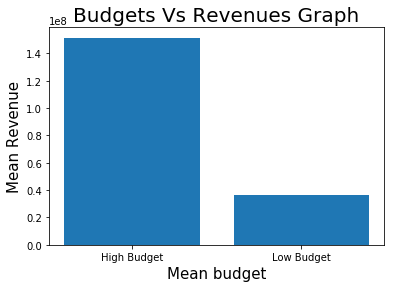

In [35]:
locations = [1, 2]
heights =[high_revenue_adj, low_revenue_adj]
labels = ['High Budget', 'Low Budget']

plt.bar(locations, heights, tick_label=labels)
plt.title('Budgets Vs Revenues Graph', fontsize=20)
plt.xlabel('Mean budget', fontsize=15)
plt.ylabel('Mean Revenue', fontsize=15)


### Research Question 3  ( which genres of movies are most popular over time, then from year to year)

In [36]:
df.groupby('genres')['popularity'].sum()

genres
Action                                                 37.269991
Action|Adventure                                       10.360652
Action|Adventure|Animation                              1.818651
Action|Adventure|Animation|Comedy|Drama                 0.370019
Action|Adventure|Animation|Comedy|Family                0.063246
Action|Adventure|Animation|Drama|Family                 0.132458
Action|Adventure|Animation|Family                       1.616152
Action|Adventure|Animation|Family|Fantasy               1.603381
Action|Adventure|Animation|Family|Mystery               0.201030
Action|Adventure|Animation|Family|Science Fiction       4.262132
Action|Adventure|Animation|Fantasy                      0.070257
Action|Adventure|Animation|Fantasy|Horror               0.155075
Action|Adventure|Animation|Fantasy|Science Fiction      0.401188
Action|Adventure|Animation|Science Fiction              1.710748
Action|Adventure|Animation|Science Fiction|Crime        0.559451
Action|Adventure|A

In [37]:
# which genres are most popular.
# to answer this question we have first to consider that the data in genres column as it contains more than one string splitted by pipe character '|'
# this is clearly shown in the previous code, we'' find the column 'genres' have more than one string in each row.
# the best method and the simple one is to consider the first string in each row as the main category of the genres and neglect the remaining string.
# to split the first string
genres_new = df['genres'].str.split("|", n = 0, expand = True)
genres_new

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None
5,Western,Drama,Adventure,Thriller,None
6,Science Fiction,Action,Thriller,Adventure,None
7,Drama,Adventure,Science Fiction,None,None
8,Family,Animation,Adventure,Comedy,None
9,Comedy,Animation,Family,None,None


In [38]:
# now we'll consider only the first column from multiple columns created from splitting the strings in genres column
genres_adj = genres_new[0]
genres_adj

0                 Action
1                 Action
2              Adventure
3                 Action
4                 Action
5                Western
6        Science Fiction
7                  Drama
8                 Family
9                 Comedy
10                Action
11       Science Fiction
12                 Drama
13                Action
14                Action
15                 Crime
16                 Crime
17       Science Fiction
18               Romance
19                   War
20                Action
21                Action
22                Action
23                 Drama
24                Comedy
25                Action
26                Comedy
27                 Crime
28                 Drama
29                Action
              ...       
10836             Comedy
10837                War
10838             Action
10839             Family
10840           Thriller
10841            Western
10842          Animation
10843          Adventure
10844          Adventure


In [39]:
# adding the new column (genres_adj) to the dataset, this column has only on string each row, 
df['genres_adj'] = genres_adj

In [40]:
# deleting the old column (genres) with multiple strings in each row.
df.drop(['genres'], axis=1)

,id,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,262500,13.112507,Insurgent,Robert Schwentke,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,168259,9.335014,Furious 7,James Wan,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action
5,281957,9.110700,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,Western
6,87101,8.654359,Terminator Genisys,Alan Taylor,125,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,Science Fiction
7,286217,7.667400,The Martian,Ridley Scott,141,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,Drama
8,211672,7.404165,Minions,Kyle Balda|Pierre Coffin,91,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09,Family
9,150540,6.326804,Inside Out,Pete Docter,94,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08,Comedy


In [52]:
# Now we can use groupby to see which genres are most popular over entire time
df.groupby('genres_adj')['popularity'].mean()

genres_adj
Action             0.837782
Adventure          1.217868
Animation          0.817977
Comedy             0.538260
Crime              0.694063
Documentary        0.179317
Drama              0.553444
Family             0.739779
Fantasy            0.865390
Foreign            0.167124
History            0.764636
Horror             0.468638
Music              0.462125
Mystery            0.596896
Romance            0.707231
Science Fiction    1.082355
TV Movie           0.245873
Thriller           0.673381
War                0.767041
Western            0.690646
Name: popularity, dtype: float64

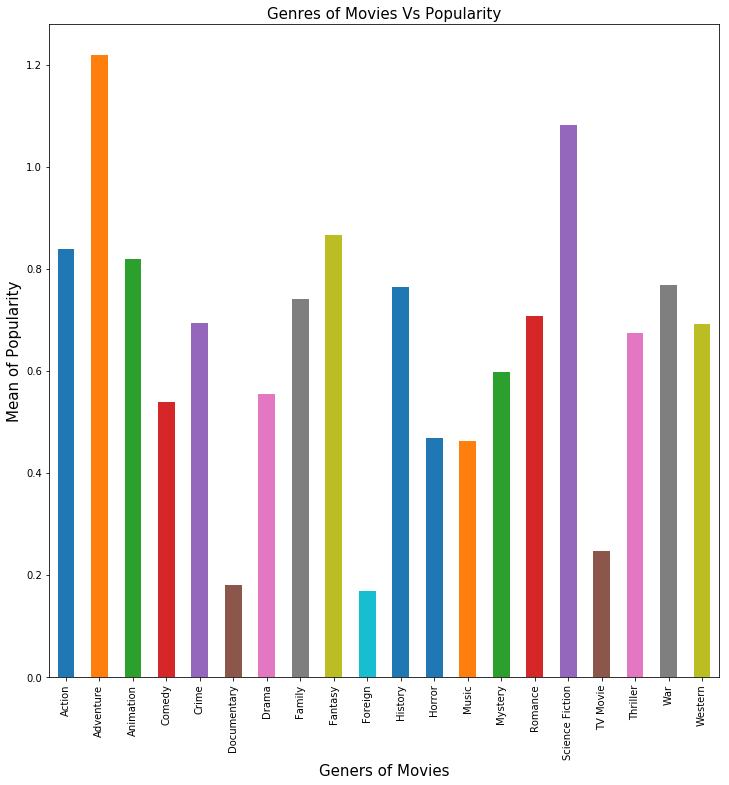

In [118]:
# ploting the last result in graph
df1 = df.groupby('genres_adj')['popularity'].mean().plot(kind='bar', figsize=(12,12));
plt.title('Genres of Movies Vs Popularity', fontsize=15)
plt.xlabel('Geners of Movies', fontsize=15)
plt.ylabel('Mean of Popularity', fontsize=15);

In [74]:
# using groupby again to see which genres are most popular from year to year
df.groupby(['genres_adj', 'release_year'])['popularity'].mean()

genres_adj  release_year
Action      1960            0.590724
            1961            0.540904
            1962            0.299207
            1963            1.008599
            1964            0.254216
            1965            0.268987
            1966            0.254542
            1967            0.530274
            1968            0.368664
            1969            0.420294
            1970            0.227680
            1971            0.508694
            1972            0.343920
            1973            0.455597
            1974            0.331369
            1975            0.271900
            1976            0.374327
            1977            0.407406
            1978            0.409209
            1979            0.763054
            1980            0.381385
            1981            0.314431
            1982            0.483564
            1983            0.546067
            1984            0.840223
            1985            0.589887
            1

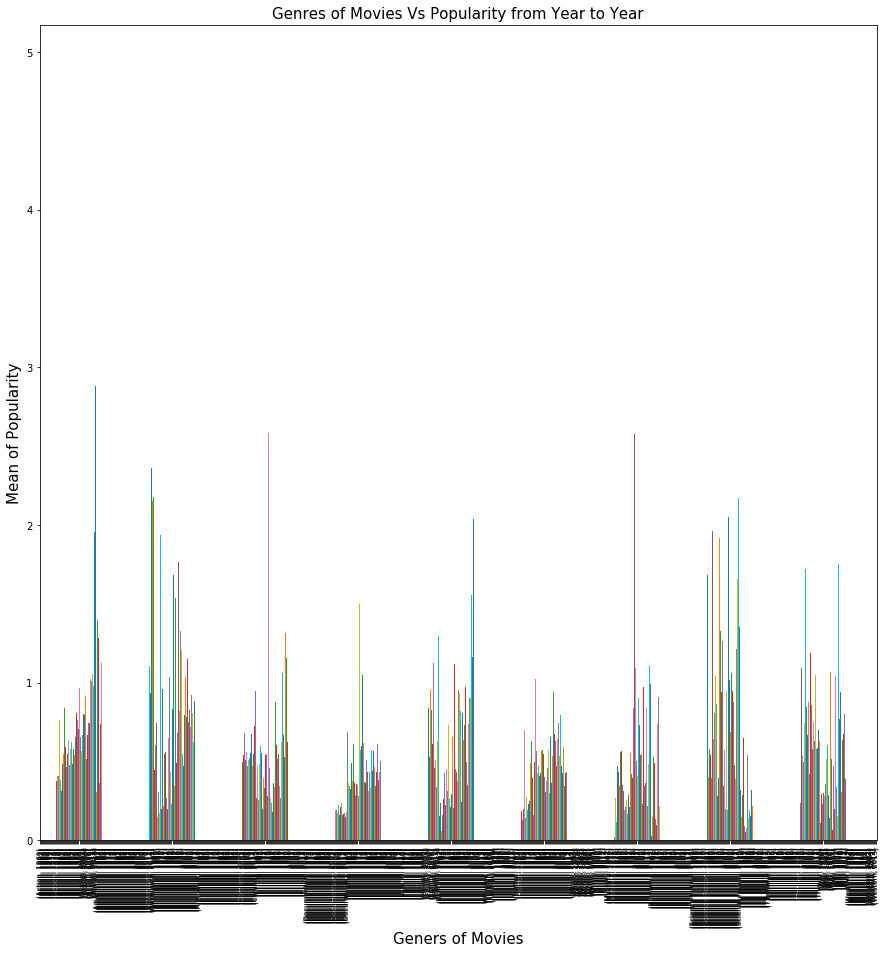

In [127]:
# plotting the previous result
df.groupby(['genres_adj', 'release_year'])['popularity'].mean().plot(kind='bar', figsize=(15,15));
plt.title('Genres of Movies Vs Popularity from Year to Year', fontsize=15)
plt.xlabel('Geners of Movies', fontsize=15)
plt.ylabel('Mean of Popularity', fontsize=15)
plt.xticks(fontsize=7, rotation=90);

### Research Question 4  (what kind of movies that get the higher revenues )

In [91]:
# calculating the maximum revenue by any movie
df.revenue_adj.max()

2827123750.41189

In [92]:
# choosing movies with revenues more tha 1000,000000,  
max_revenue_movies = df.query('revenue_adj>1000000000')
max_revenue_movies

,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,168259,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action
8,211672,7.404165,Minions,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09,Family
14,99861,5.944927,Avengers: Age of Ultron,Joss Whedon,141,Action|Adventure|Science Fiction,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09,Action
1329,11,12.037933,Star Wars,George Lucas,121,Adventure|Action|Science Fiction,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09,Adventure
1334,840,1.104816,Close Encounters of the Third Kind,Steven Spielberg,135,Science Fiction|Drama,11/16/77,600,7.0,1977,7.195562e+07,1.092965e+09,Science Fiction
1386,19995,9.432768,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,Action
1921,12155,5.572950,Alice in Wonderland,Tim Burton,108,Family|Fantasy|Adventure,3/3/10,2853,6.3,2010,2.000000e+08,1.025467e+09,Family
1930,10193,2.711136,Toy Story 3,Lee Unkrich,103,Animation|Family|Comedy,6/16/10,2924,7.5,2010,2.000000e+08,1.063172e+09,Animation


In [94]:
df.groupby('genres_adj')['revenue_adj'].sum()

genres_adj
Action             1.503273e+11
Adventure          1.086293e+11
Animation          4.493714e+10
Comedy             1.406284e+11
Crime              2.523616e+10
Documentary        6.538793e+09
Drama              1.388816e+11
Family             1.573888e+10
Fantasy            2.820308e+10
Foreign            4.316645e+08
History            3.526445e+09
Horror             4.520415e+10
Music              5.307794e+09
Mystery            6.914789e+09
Romance            1.092444e+10
Science Fiction    2.477224e+10
TV Movie           2.042366e+09
Thriller           2.499944e+10
War                4.501118e+09
Western            3.487604e+09
Name: revenue_adj, dtype: float64

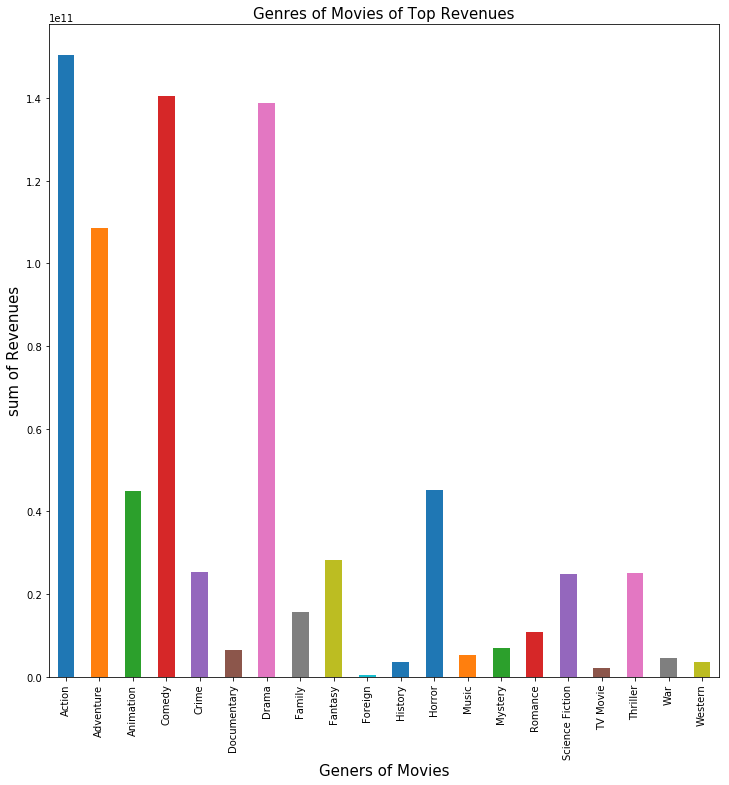

In [116]:
# Define Genres of movies with top sum of revenues
df.groupby('genres_adj')['revenue_adj'].sum().plot(kind='bar', figsize=(12,12))
plt.title('Genres of Movies of Top Revenues', fontsize=15)
plt.xlabel('Geners of Movies', fontsize=15)
plt.ylabel('Sum of Revenues', fontsize=15);

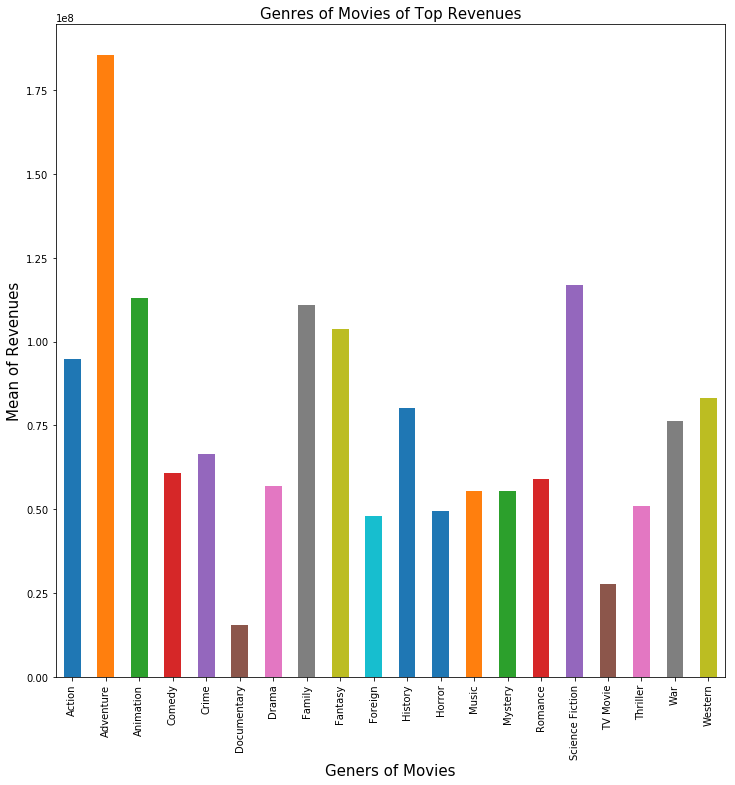

In [128]:
# Define Genres of movies with top mean of revenues
df.groupby('genres_adj')['revenue_adj'].mean().plot(kind='bar', figsize=(12,12));
plt.title('Genres of Movies of Top Revenues', fontsize=15)
plt.xlabel('Geners of Movies', fontsize=15)
plt.ylabel('Mean of Revenues', fontsize=15);

<a id='conclusions'></a>
## Conclusions

## from this investigation we can finally conclude the answers of the questions that were posed at the beginning of this investigation:
#### 1- the populirty of movies are connected with both the budget of movie and of course the revenue of this movie. accordingly the movies with high budget or/and high revenue will be of higher popularity and viceversa.
#### 2- the number of most movies genres (count) in IMDB are Drama films then Comedy film, Thriller and finally Action films, in the other hand the less number of movies genres available in IMDB are the Tv films and Western Films.
#### 3- the most genres of movies with high popularity are adventure films in the foreground, then science fiction, fantasy, action and animation . . and these films with less popularity are foreign films, ducumentaries and tv-films.
#### 4- what kind of movies that win higher revenues: in case we consider the higher sum of revenue, Action films are in the foreground then the comedy films, drama then adventure films, but in case we consider it with the higher mean avenues. then the adventure films wil be the first. 

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [2]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0